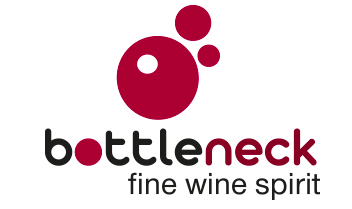**Entreprise de vente de vin très prestigieux.**

# Introduction 

L'entreprise Bottleneck fait la vente en ligne de vin très prestigieux. Elle possède un sytème de gestion intégrée qui permet d'identifier ses produits stockés mais qui n'est relié au site de vente en ligne. Cela a pour conséquence la gestion complexe des stocks et la reduction de la visibilité en terme d'analyse des produits vendus en ligne.   

**L'objectif principal**: optimiser la gestion des produits de l'entreprise.

**Missions confiées:**
- faire le rapprochement des 2 bases (l'ERP et la table de l'outils CMS) 
- calculer le CA par produit et le total du CA des produits en ligne
- faire une analyse des données en gérant les erreurs et les valeurs aberrantes 

# Définition des termes

**ERP**: Enterprise Resource Planning ou encore parfois appelé PGI (Progiciel de Gestion Intégré) est un système d’information qui permet de gérer et suivre au quotidien, l’ensemble des informations et des services opérationnels d’une entreprise. c’est un système qui garantit la piste d’audit : il est facile de retrouver et d’analyser l’origine de chaque information.

**Identifiant du produit(product_id)**: il joue un rôle important dans l'optimisation des flux et l'amélioration des performances. Les identifiants uniques des produits permettent d'accroitre la visibilité de nos annonces, d'obtenir un meilleur classement sur les moteurs de recherche et de promouvoir nos produits aux côtés d'autres articles similaires.

**CMS** Content Management System, en français Système de Gestion de Contenu est un terme vague, puisqu’en fait tout  logiciel gère un contenu. Plus précisément on donne ce nom à un logiciel qui gère la création et la publication de documents, éventuellement de façon collaborative.Sur ce site, on parlera plutôt des CMS en tant qu’applications web, donc de logiciels d’aide à la mise en ligne de documents sur Internet. Dans notre cas ce CMS s'apparente au        e-commerce pour la gestion des transactions, la gestion de la mise en ligne des produits de vins pour la vente.
        
**Post_type** ou types de publications en français sont un ensemble de contenus. Il existe plusieurs types de        publication:
* **les articles** pour le blog.Ils sont classés chronologiquement et disposent d'une parge d'archive qui      listent par défaut les 10 derniers, et d'une page single qui affichera un article en entier.   
* **les pages** sont indépendantes mais peuvent etre classées hierarchiquement avec une relation parent/enfant    représenté dans l'URL de manière suivante: monsite.fr/parent/enfant.    
* **les attachments** sont les média de votre bibliothèque (images, sons, videos...) ou encore les menus de      navigation. Chaque fichier joint a un identifiantv unique et des métadonnées telles que son titre, sa description, le texte ALT, etc.    
* **les révisions** qui sont des sauvetages automatiques de vos articles que vous pouvez récuperer en cas de problèmes.  
           
**SKU** signifie « Stock Keeping Unit » ou UGS, Unité de Gestion des Stocks, en français. C'est une référence unique  qui permet l'identification simple de produits grâce à une suite de chiffres et de lettres structurées de la même manière. Cette référence est généralement utilisée en interne et reprises sur différents outils de gestion des stocks. Le sku permet de suivre en interne les produits: stocks, livraison...

**liaision**: c'est le rapprochement entre les bases ERP et CMS de notre projet. 

# Utilisation des librairies Python 

- Pandas pour la manipulation et l'exploration des données sous forme de dataframe
- Numpy pour les calcul numériques
- Seaborn pour la visualisation des données
- matplotlib pour tracer les graphiques et visualiser les données

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sb

# Lecture des jeux de données

In [2]:
erp_df = pd.read_excel("erp.xlsx")
web_df = pd.read_excel("web.xlsx")
liaison_df = pd.read_excel("liaison.xlsx")

# Exploration des jeux de données 

#### Dataset1: ERP 

* Découverte des 5 premières lignes 

In [3]:
erp_df.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


* Vérification de la taille du data frame

In [4]:
erp_df.shape

(825, 5)

* Verification des valeurs manquantes 

In [5]:
erp_df.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

* Vérification des types de données

In [6]:
erp_df.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

* Description statistique des variables numériques

In [7]:
erp_df.describe(include="number")

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


* Description statistique des variables catégoriques

In [8]:
erp_df.describe(include="object")

,stock_status
count,825
unique,2
top,instock
freq,638


*La variable "stock_status" contient 2 valeurs uniques*

* Vérifier si tous les valeurs **outofstock** correspondent uniquement aux valeurs de stock_quantity = 0

In [9]:
erp_df[erp_df["stock_status"]=="outofstock"]["stock_quantity"].sum()

0

In [10]:
erp_df[erp_df["stock_status"]=="instock"]["stock_quantity"].sum()

21860

*La variable "product_id" une clé candidate*

* Recherche de doublons dans la colonne "product_id"

In [11]:
doublon = (erp_df.duplicated(["product_id"])==True)

In [12]:
erp_df[doublon]

,product_id,onsale_web,price,stock_quantity,stock_status


* Verification du numbre de valeurs uniques de **product_id**

In [13]:
erp_df["product_id"].nunique()==len(erp_df)

True

Il n'y a pas de doublons dans ce dataframe.le nombre de valeur unique de **product_id** = à la taille de data frame. Donc la variable **"product_id" est la clé primaire de cette table**. 

#### DataSet2: Web

* Decouvrir les 5 premières lignes du data frame

In [14]:
web_df.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


* Vérification de la taille du dataframe

In [15]:
web_df.shape

(1513, 28)

* Vérification des types de données 

In [16]:
web_df.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


* Calcul du pourcentage des valeurs manquantes

In [17]:
(web_df.isna().sum() / web_df.shape[0]).sort_values(ascending=True)

virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
comment_count            0.054858
post_modified_gmt        0.054858
ping_status              0.054858
comment_status           0.054858
post_status              0.054858
post_parent              0.054858
post_title               0.054858
guid                     0.054858
post_date                0.054858
post_name                0.054858
post_author              0.054858
menu_order               0.054858
post_type                0.054858
total_sales              0.054858
average_rating           0.054858
post_date_gmt            0.054858
post_modified            0.054858
sku                      0.056180
tax_status               0.526768
post_excerpt             0.526768
post_mime_type           0.528090
post_content_filtered    1.000000
post_content             1.000000
tax_class                1.000000
post_password            1.000000
dtype: float64

*Toutes les variables qui ont plus de 90% de valeurs manquantes seront supprimés: "post_content_filtered", "post_content", "tax_class, post_password"*   

* Identification des colonnes contenant les variables numériques et les variables catégoriques

In [18]:
num_column = web_df.select_dtypes(include="number").columns
cat_column = web_df.select_dtypes(include="object").columns
print(f"Voici les colonnes numeriques de ce data frame \n {list(num_column)}")
print(100*"=")
print(f"Voici les colonnes categoriques de ce data frame \n {list(cat_column)}")

Voici les colonnes numeriques de ce data frame 
 ['virtual', 'downloadable', 'rating_count', 'average_rating', 'total_sales', 'tax_class', 'post_author', 'post_content', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'comment_count']
Voici les colonnes categoriques de ce data frame 
 ['sku', 'tax_status', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_name', 'guid', 'post_type', 'post_mime_type']


* Analyse statistique descriptive des Variables numériques 

In [19]:
web_df.describe(include="number")

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


*Les variables numériques: "virtual", "downloadable", "rating_count", "average_rating", "post_parent", "menu_order", "comment_count" ne donnent aucune information car elles comportent toutes des valeurs nulles, donc seront supprimées.*   

* Analyse statistique descriptive des Variables catégoriques

In [20]:
web_df.describe(include="object")

,sku,tax_status,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,guid,post_type,post_mime_type
count,1428,716,1430,716,1430,1430,1430,1430,1430,1430,714
unique,714,1,713,679,1,1,1,716,1430,2,1
top,14332,taxable,Domaine Hauvette IGP Alpilles Jaspe 2017,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,ollieux-romanis-corbieres-cuvee-prestige-blanc...,https://www.bottle-neck.fr/wp-content/uploads/...,product,image/jpeg
freq,2,716,4,12,1430,1430,1430,2,1,716,714


*La variable "sku" contient 1428 lignes avec 714 valeurs uniques qui sont repétées uniques la variable "sku" est une clé candidate pour cette table* contenant des doublons.
*Post_type contient deux valeurs uniques repetées 716 fois
*Les variables "tax_status", "post_excerpt" et "post_mime_type" contiennent plus de 50% de lignes manquantes sont seront supprimées.

* Suppression des colonnes "inutiles"

In [21]:
web_df.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [22]:
web_df.drop(columns=['virtual', 'post_author', 'post_title', 'post_name', 'guid', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_date',
        'post_date_gmt', 'post_content', 'post_password', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'menu_order', 'tax_status', 'post_excerpt', 'comment_count', 'post_mime_type'], inplace=True)

* Découverte des 5 premières lignes du dataframe après suppression des colonnes "inutiles"

In [23]:
web_df.head()

,sku,total_sales,post_status,comment_status,ping_status,post_type
0,bon-cadeau-25-euros,10.0,publish,closed,closed,product
1,15298,6.0,publish,closed,closed,product
2,15296,0.0,publish,closed,closed,product
3,15300,0.0,publish,closed,closed,product
4,19814,3.0,publish,closed,closed,product


* Vérification de la taille du data frame

In [24]:
web_df.shape

(1513, 6)

* Identification des valeurs uniques de la variable **post_type**

In [25]:
web_df["post_type"].unique()

array(['product', nan, 'attachment'], dtype=object)

*La variable "post_type" comporte deux valeurs uniques qui sont "product" et "attachment"*

* Identification de la valeur unique **attachment**

In [26]:
web_attachment_df = web_df[web_df['post_type']=='attachment']
web_attachment_df.head()

,sku,total_sales,post_status,comment_status,ping_status,post_type
799,15298,6.0,publish,closed,closed,attachment
800,15296,0.0,publish,closed,closed,attachment
801,15300,0.0,publish,closed,closed,attachment
802,19814,3.0,publish,closed,closed,attachment
803,19815,0.0,publish,closed,closed,attachment


* Vérification des valeurs manquantes de **attachment**

In [27]:
web_attachment_df.isnull().sum()

sku               0
total_sales       0
post_status       0
comment_status    0
ping_status       0
post_type         0
dtype: int64

* Vérification de la taille de **attachment**

In [28]:
len(web_attachment_df.index)

714

* Identification de la valeur unique **product**

In [29]:
web_product_df = web_df[web_df["post_type"]=="product"]
web_product_df.head()

,sku,total_sales,post_status,comment_status,ping_status,post_type
0,bon-cadeau-25-euros,10.0,publish,closed,closed,product
1,15298,6.0,publish,closed,closed,product
2,15296,0.0,publish,closed,closed,product
3,15300,0.0,publish,closed,closed,product
4,19814,3.0,publish,closed,closed,product


* Vérifications des valeurs manquantes de **product**

In [30]:
web_product_df.isnull().sum()

sku               2
total_sales       0
post_status       0
comment_status    0
ping_status       0
post_type         0
dtype: int64

* Vérification du nombre de valeurs uniques de **product**

In [31]:
web_product_df["sku"].nunique()

714

* Faire un tri de la colonne "sku" sans les valeurs manquantes

In [32]:
web_product_df = web_product_df[web_product_df['sku'].notnull()]
web_product_df.shape

(714, 6)

- **product** et **attachment** ont le même **sku** - Le dataframe **web_product_df** est retenue - Nous avons 714 références uniques de sku, donc **sku est la clé primaire de cette table**

#### Dataset3: liaison 

* Decouverte des 5 premières lignes du data frame

In [33]:
liaison_df.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


* Renommer "id_web" par "sku"

In [34]:
liaison_df.rename(columns={"id_web":"sku"}, inplace=True)
liaison_df.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


* Vérification de la taille du dataframe

In [35]:
liaison_df.shape

(825, 2)

* Vérification de valeurs manquantes 

In [36]:
liaison_df.isnull().sum()

product_id     0
sku           91
dtype: int64

* Vérification du type de données

In [37]:
liaison_df.dtypes

product_id     int64
sku           object
dtype: object

In [38]:
liaison_df["product_id"].nunique()==len(liaison_df)

True

Seule la variable "sku" contient des valeurs manquantes."product_id" contient le même nombre de lignes que celles de liaison_df. Donc nos pouvons dire qu'il n'ya pas de doublons dans cette table car les identifiants sont les mêmes.
**"product_id" est la clé primaire et "sku" constitue la clé secondaire de cette table.**

# Rapprochement des exports 

* Faire une première jointure externe entre les dataframes **erp_df** et **liaison_df** à partir de la colonne **product_id** 

In [39]:
rapprochement1_df =erp_df.merge(liaison_df, on=["product_id"], how="outer")
rapprochement1_df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


* Vérification de la taille du data frame après la 1ère jointure

In [40]:
rapprochement1_df.shape

(825, 6)

* Vérification des valeurs manquantes

In [41]:
rapprochement1_df.isnull().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
sku               91
dtype: int64

* Faire un deuxième jointure externe entre les data frames **rapprochement1_df** et **web_product_df** à partir de la colonne **sku**

In [42]:
rapprochement_df = rapprochement1_df.merge(web_product_df,on='sku', how='outer')
rapprochement_df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_status,comment_status,ping_status,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,publish,closed,closed,product
1,3849,1,34.3,0,outofstock,15296,0.0,publish,closed,closed,product
2,3850,1,20.8,0,outofstock,15300,0.0,publish,closed,closed,product
3,4032,1,14.1,0,outofstock,19814,3.0,publish,closed,closed,product
4,4039,1,46.0,0,outofstock,19815,0.0,publish,closed,closed,product


* Vérification de la taille du data frame après la 2ème jointure

In [43]:
rapprochement_df.shape

(825, 11)

Le data frame **rapprochement_df** contient le même nombre de lignes que ceux de **liaison_df** et **erp_df**. La jointure "outer" nous a permis d'obtenir les même identifiants uniques.

# Calcul du chiffre d'affaires pour chaque produit 

Chiffre d'Affaires(CA) = prix de vente x quantité vendue

In [44]:
rapprochement_df["chiffre_d_affaires"] = rapprochement_df["price"] * rapprochement_df["total_sales"]

In [45]:
rapprochement_df = rapprochement_df[["product_id","sku","price","total_sales", "chiffre_d_affaires"]]
print(f"Voici la liste des dix premiers chiffre d'affaires pour chacun des produits:")
rapprochement_df.head(10)

Voici la liste des dix premiers chiffre d'affaires pour chacun des produits:


,product_id,sku,price,total_sales,chiffre_d_affaires
0,3847,15298,24.2,6.0,145.2
1,3849,15296,34.3,0.0,0.0
2,3850,15300,20.8,0.0,0.0
3,4032,19814,14.1,3.0,42.3
4,4039,19815,46.0,0.0,0.0
5,4040,15303,34.3,0.0,0.0
6,4041,14975,32.7,0.0,0.0
7,4042,16042,31.2,7.0,218.4
8,4043,14980,60.0,3.0,180.0
9,4045,16041,42.6,14.0,596.4


* Représentation graphique du chiffre d'affaire pour chaque produit

/home/yeo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/yeo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


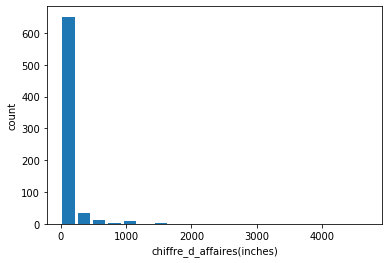

In [46]:
plt.hist(rapprochement_df.chiffre_d_affaires, bins=20, rwidth=0.8)
plt.xlabel('chiffre_d_affaires(inches)')
plt.ylabel('count')
plt.show()

Plus de 65% des produits ont un chiffre d'affaires nulle donc n'ont pas été vendus en ligne. Les autres produits qui sont vendus environ 30% ont un chiffre d'affaires inférieur à 500 EUR. 5% des produits par contre ont un chiffre d'affaires très élevé jusqu'à atteindre 1500 EUR. **Ces produits qui auraient donc des prix qui se distinguent des autres sont appelés des valeurs aberrantes ou outliers.**

# Calcul du chiffre d'affaires total

In [47]:
chiffre_d_affaires_total = rapprochement_df["chiffre_d_affaires"].sum()

In [48]:
print(f"Le chiffre d'affaires total est de: {chiffre_d_affaires_total.round(3)} EUR")

Le chiffre d'affaires total est de: 70568.6 EUR


Malgré la faible quantité de produits vendus en ligne, le chiffre d'affaires total est élevé. 

# Recherche d'outliers au niveau du prix des produits

**Un outlier** est une valeur extrême ou une anomalie qui peut être decrite comme une donnée qui s'écarte trop du reste des observations c'est à dire qu'elle se distingue nettement des autres.

La recherche des outliers se fait selon deux méthodes: **le z-score et les quartiles**


### Le z-score pour la détection des outliers

Le z-score ou le score standard d'une observation désigne le nombre d'écarts-types qui se trouve au-dessus ou en dessous de la moyenne d'une population. Pour utiliser un score z, il faut connaître la moyenne μ et en outre l’écart-type σ de la population.

Sa formule est la suivante: **z-score = (x – μ)/σ**

Pour une distribution normale(en forme de cloche), 68,27% des valeurs sont comprises dans l'intervalle [µ-σ;µ+σ], 95,45% sont comprises dans l'intervalle [µ-2σ;µ+2σ] et 99,73% sont comprises dans l'intervalle [µ-3σ;µ+3σ].

* Analyse statistique de la variable **price** du data frame **rapprochement_df**

In [49]:
rapprochement_df.price.describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

* Représentation graphique de la variable **price**

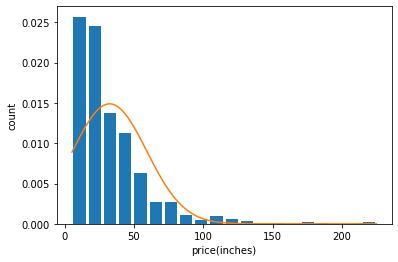

In [50]:
from scipy.stats import norm
import numpy as np
plt.hist(rapprochement_df.price, bins=20, rwidth=0.8, density=True)
plt.xlabel("price(inches)")
plt.ylabel("count")

rng = np.arange(rapprochement_df.price.min(), rapprochement_df.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,rapprochement_df.price.mean(),rapprochement_df.price.std()))

La distribution est asymétrique particulièrement à gauche. Les plus petites valeurs observées (les petits prix) sont les plus fréquentes que les valeurs les plus élévées (les prix élévés). D'autres valeurs par contre se distinguent nettement des autres. **Ces sont des vaeurs aberrantes.**

####  Etapes pour le calcul du zscore
- µ = moyenne 
- σ = écart type
- z score = (x - µ)/σ 
- Si la valeur de |z| est supérieur à 2, alors nous pouvons dire que la distribution est inhabutuelle ou excelptionelle.
- determiner les valeurs aberrantes

* Calcul de la moyenne et de l'ecart type au niveau du prix des produits 

In [51]:
mean = rapprochement_df["price"].mean()
std = rapprochement_df["price"].std()
print(f"La moyenne du prix des produits est", mean)
print(f"L'écart type du prix des produits est", std)

La moyenne du prix des produits est 32.415636363636374
L'écart type du prix des produits est 26.795849199710545


* Calcul du z-score au niveau du prix des produits

In [52]:
rapprochement_df["zscore"] = (rapprochement_df.price - rapprochement_df.price.mean())/rapprochement_df.price.std()
rapprochement_df = rapprochement_df[["product_id","price","sku", "zscore"]]

In [53]:
rapprochement_df.head()

,product_id,price,sku,zscore
0,3847,24.2,15298,-0.306601
1,3849,34.3,15296,0.070323
2,3850,20.8,15300,-0.433486
3,4032,14.1,19814,-0.683525
4,4039,46.0,19815,0.506958


* Représentation graphique des z-scores

Text(0, 0.5, 'count')

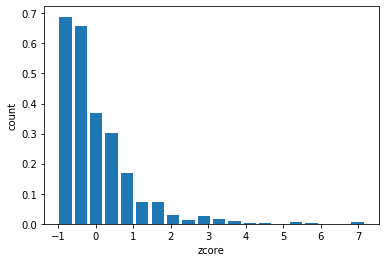

In [54]:
plt.hist(rapprochement_df.zscore,bins=20, rwidth=0.8, density=True)
plt.xlabel("zcore")
plt.ylabel("count")

z-score > 2, environ 5% des prix des produits sont au delà de 2 écart types par raport à la moyenne. Ces prix se distinguent donc des autres: ce sont des outliers.

* Recherche de la liste des outliers

Si la valeur du z-score est supérieure à 2 alors la valeur du prix de ce produit est un outlier

In [55]:
df = rapprochement_df[["product_id","price","sku", "zscore"]]

In [56]:
df[df["zscore"]< -2]

,product_id,price,sku,zscore


In [57]:
print(f"Voici la liste des produits qui comportent des outliers")
print(df[df["zscore"]> 2]["price"].sort_values(ascending=False))

Voici la liste des produits qui comportent des outliers
291    225.0
525    217.5
692    191.3
310    176.0
657    175.0
313    157.0
30     144.0
478    137.0
752    135.0
293    126.5
615    124.8
708    122.0
764    121.0
767    121.0
758    116.4
763    115.0
766    115.0
709    114.0
538    112.0
320    109.6
311    108.5
757    105.6
531    105.0
530    105.0
314    104.0
477    102.3
154    100.0
765     99.0
707     93.0
605     92.0
55      92.0
156     88.4
539     86.8
19      86.1
Name: price, dtype: float64


In [58]:
len(df[(df["zscore"]> 2) | (df["zscore"]< -2)])

34

Nous avons 34 valeurs aberrantes

### Méthode des quartiles pour la recherche des outliers

Un box plot ou boxplot est une méthode permettant de représenter graphiquement des groupes de données numériques à travers leurs quartiles.

Les valeurs aberrantes peuvent être représentées sous forme de points individuels. Les diagrammes en boîtes sont non-paramétriques : ils montrent la variation des échantillons d’une population statistique sans faire d’hypothèses sur la distribution statistique sous-jacente (bien que le diagramme en boîtes de Tukey suppose une symétrie pour les moustaches et une normalité pour leur longueur). La boîte et les moustaches représentent des quartiles, et la bande à l’intérieur de la boîte est toujours le deuxième quartile (la médiane). Mais l’extrémité des moustaches peut représenter plusieurs valeurs alternatives possibles, parmi lesquelles le minimum et le maximum de toutes les données. la donnée la plus basse se situant toujours à 1,5 IQR du quartile inférieur, et la donnée la plus élevée se situant toujours à 1,5 IQR du quartile supérieur (souvent appelé le boxplot de Tukey).

IQR = Inter quartile Range
IQR = Q3 - Q1
Lower boundary = Q1 - 1.5*IQR
Upper boundary = Q3 + 1.5*IQR


* **Technique visuelle**: définir une fonction appelée **boxplot**

In [59]:
def plot_boxplot(df, pdt):
    df.boxplot(column=[pdt])
    plt.grid(True)
    plt.show()

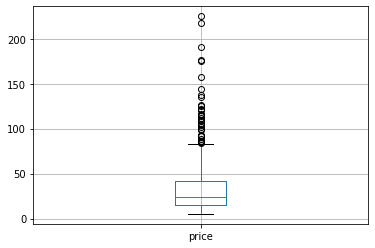

In [60]:
plot_boxplot(rapprochement_df, "price")

On constate que la distribution au niveau des prix n'est pas homogène 

Au moins 50% des prix des produits sont en dessous de 30 EUR

Le maximum des prix des produits sont en dessous de 80 EUR

Au dessus 80 EUR nous avons des valeurs aberrantes 

* **Technique analytique**:définir une fonction appelée **outliers** laquelle retourne la liste des index des outliers

In [61]:
def outliers(df, pdt):
    Q1 = df[pdt].quantile(0.25)
    Q3 = df[pdt].quantile(0.75)
    IQR = Q3 - Q1 
    
    low_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df[(df[pdt] < low_bound) | (df[pdt] > upper_bound)][pdt]
    print(ls)
    return ls

* Créer une liste vide dans laquelle seront stockées les index des valeurs aberrantes 

In [62]:
print(f"Voici la liste des outliers")

outliers_list = []
for price in ["price"]:
    outliers_list.extend(outliers(rapprochement_df,price))

Voici la liste des outliers
19      86.1
30     144.0
47      84.7
55      92.0
154    100.0
156     88.4
291    225.0
293    126.5
297     85.6
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
539     86.8
605     92.0
610     83.7
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64


In [63]:
len(outliers_list)

37

Nous avons au total 37 outliers

Remarque: avec la méthodes du Boxplot, nous avons plus de valeurs aberrantes que celle du zscore. 